In [1]:
import pandas as pd

import utilities.Utilities as util

In [2]:
DATA_SET_PATH = "data/dataset_test.parquet"
sales_history_df = util.read_parquet(DATA_SET_PATH)

### First Look at the Data

Display the first 5 rows of the data.

In [3]:
sales_history_df.head()

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33236916,8350,Gaseosas,1
1,2022-01-03,33237477,15354,Maltas,5
2,2022-01-03,33229164,14016,Cervezas,25
3,2022-01-03,33229164,22270,Cervezas,2
4,2022-01-03,33229164,23760,Cervezas,21


In [4]:
df_size = sales_history_df.shape
f"DataFrame with Transactions: {df_size[0]}, Variables: {df_size[1]}"

'DataFrame with Transactions: 116211465, Variables: 5'

### Data Types

Display data type for each DataFrame column

In [5]:
sales_history_df.dtypes

Date          object
Account_id     int64
Product_id     int64
Category      object
Quantity       int32
dtype: object

Define column names as constants

In [6]:
DATE = "Date"
ACCOUNT_ID = "Account_id"
PRODUCT_ID = "Product_id"
CATEGORY = "Category"
QUANTITY = "Quantity"

In [7]:
util.describe(sales_history_df, DATE)

count      116211465
unique           188
top       2022-01-13
freq         1154597
Name: Date, dtype: object

In [8]:
util.describe(sales_history_df, ACCOUNT_ID, as_categorical=True)

,Account_id
count,116211465
unique,12618
top,38169702
freq,129367


In [9]:
util.describe(sales_history_df, PRODUCT_ID, as_categorical=True)

,Product_id
count,116211465
unique,182
top,15354
freq,9763817


In [10]:
util.describe(sales_history_df, CATEGORY)

count     116211465
unique            7
top        Gaseosas
freq       52033722
Name: Category, dtype: object

In [11]:
util.describe(sales_history_df, QUANTITY, as_categorical=True)

,Quantity
count,116211465
unique,982
top,1
freq,43635719


In [12]:
util.describe(sales_history_df, QUANTITY)

count    1.162115e+08
mean     1.438517e+01
std      9.367268e+01
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      6.000000e+00
max      1.187600e+04
Name: Quantity, dtype: float64

In [13]:
#sales_history_df[QUANTITY].plot.box(column=QUANTITY)

In [14]:
#sales_history_df[QUANTITY].plot.hist(bins=20)

### Orders per Category

<AxesSubplot:ylabel='users'>

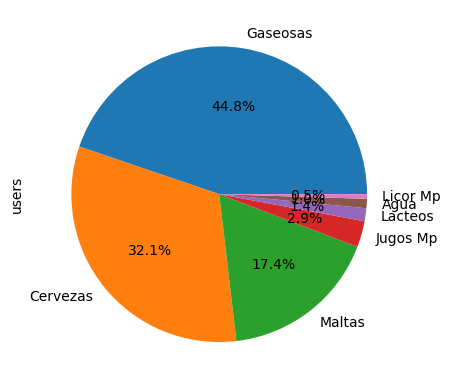

In [15]:
sales_history_df[[QUANTITY,CATEGORY]].groupby([CATEGORY]).size().sort_values(ascending=False).plot(
    kind="pie",
    ylabel="users",
    autopct="%1.1f%%")

### Quantity per Category

<AxesSubplot:xlabel='Category'>

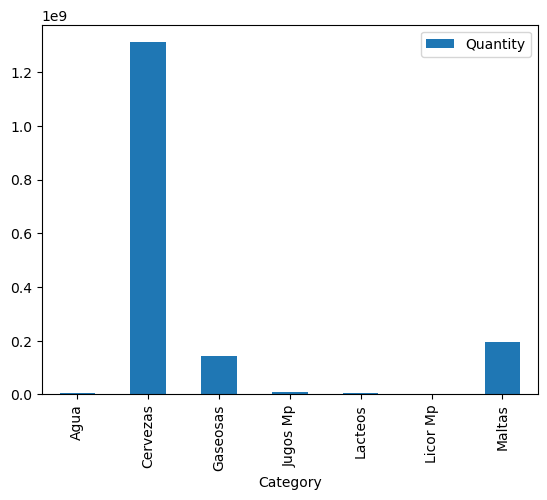

In [16]:
sales_history_df[[QUANTITY,CATEGORY]].groupby([CATEGORY]).sum().plot(kind="bar")

Gaseosas are the most frequent buy, but Cervesas are bought in more volumen.

## Find Null Values

In [17]:
has_null_values = util.any_null_value(sales_history_df)
f"The DataFrame has any null value: {has_null_values}"

'The DataFrame has any null value: False'

## Remove Duplicated Rows
There are duplicated rows. For instance the ones whose DATE == 2022-01-03 AND ACCOUNT_ID == 33237477

In [18]:
sales_history_df[(sales_history_df[DATE] == "2022-01-03") & (sales_history_df[ACCOUNT_ID] == 33237477)].head()

,Date,Account_id,Product_id,Category,Quantity
1,2022-01-03,33237477,15354,Maltas,5
2084,2022-01-03,33237477,15354,Maltas,5
3428,2022-01-03,33237477,15354,Maltas,5
5821,2022-01-03,33237477,15354,Maltas,5
7905,2022-01-03,33237477,15354,Maltas,5


In [19]:
cleaned_df = sales_history_df.drop_duplicates(keep="first")
cleaned_df.shape

(1323785, 5)

## Remove Rows with Quantity = 0

In [20]:
cleaned_df[cleaned_df.Quantity == 0].head()

,Date,Account_id,Product_id,Category,Quantity
17636611,2022-02-01,33662733,14016,Cervezas,0
17636612,2022-02-01,33662733,29952,Cervezas,0
17636613,2022-02-01,33662733,11646,Cervezas,0
17636614,2022-02-01,33662733,17588,Cervezas,0
17636615,2022-02-01,33662733,17466,Cervezas,0


In [21]:
cleaned_df = cleaned_df[cleaned_df.Quantity != 0]

In [22]:
cleaned_df[sales_history_df.Quantity == 0].shape[0]

/var/folders/9w/xpg89hwn58sg8fwc10l2kj3m0000gn/T/ipykernel_4833/2939417107.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_df[sales_history_df.Quantity == 0].shape[0]


0

In [23]:
cleaned_df.shape

(1323743, 5)

In [24]:
cleaned_df.head(50)

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33236916,8350,Gaseosas,1
1,2022-01-03,33237477,15354,Maltas,5
2,2022-01-03,33229164,14016,Cervezas,25
3,2022-01-03,33229164,22270,Cervezas,2
4,2022-01-03,33229164,23760,Cervezas,21
5,2022-01-03,33536370,8206,Gaseosas,1
6,2022-01-03,33536370,8224,Gaseosas,1
7,2022-01-03,33536370,8370,Gaseosas,1
8,2022-01-03,33536370,8350,Gaseosas,1
9,2022-01-03,33236337,8326,Gaseosas,2


## Removed Outliers

Quantity    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

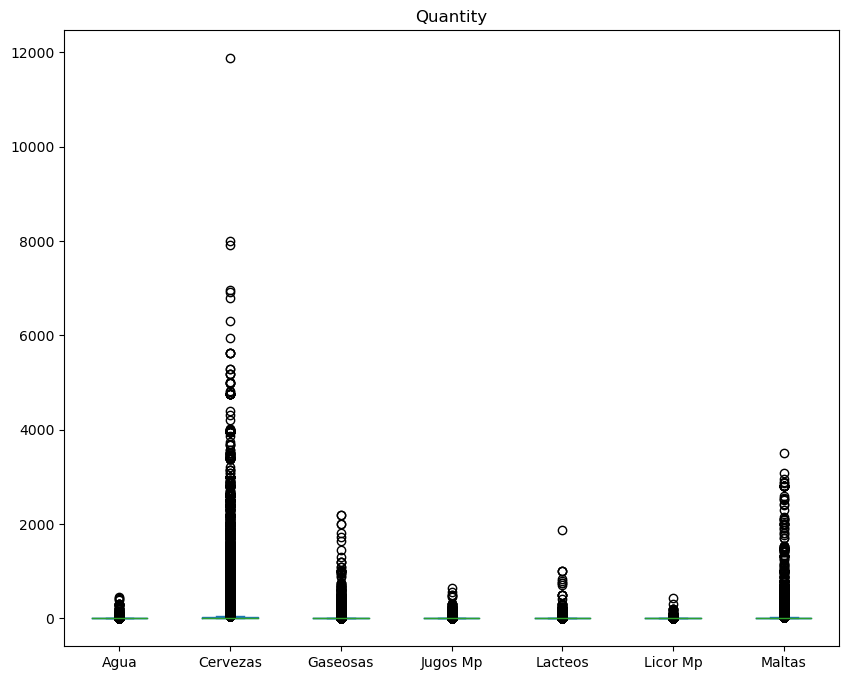

In [25]:
cleaned_df.plot.box(column=QUANTITY, by=CATEGORY, figsize=(10, 8))

In [26]:
MAX_QUANTITY = 7000
cleaned_df[cleaned_df[QUANTITY] >= MAX_QUANTITY]

,Date,Account_id,Product_id,Category,Quantity
29228482,2022-02-19,33851400,34426,Cervezas,7920
33486385,2022-02-25,33851400,16206,Cervezas,8000
86776879,2022-05-26,33228819,23752,Cervezas,11876


In [27]:
cleaned_df = cleaned_df[cleaned_df[QUANTITY] < MAX_QUANTITY]
cleaned_df.head()

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33236916,8350,Gaseosas,1
1,2022-01-03,33237477,15354,Maltas,5
2,2022-01-03,33229164,14016,Cervezas,25
3,2022-01-03,33229164,22270,Cervezas,2
4,2022-01-03,33229164,23760,Cervezas,21


Quantity    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

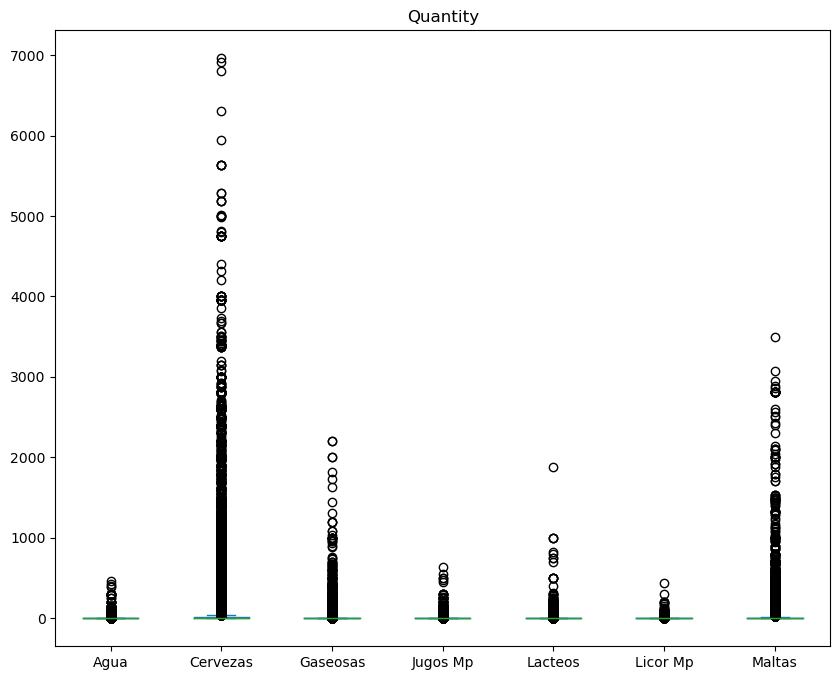

In [28]:
cleaned_df.plot.box(column=QUANTITY, by=CATEGORY, figsize=(10, 8))

In [29]:
cleaned_df.head(100)

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33236916,8350,Gaseosas,1
1,2022-01-03,33237477,15354,Maltas,5
2,2022-01-03,33229164,14016,Cervezas,25
3,2022-01-03,33229164,22270,Cervezas,2
4,2022-01-03,33229164,23760,Cervezas,21
...,...,...,...,...,...
95,2022-01-03,34426557,9850,Gaseosas,1
96,2022-01-03,34426557,12620,Gaseosas,1
97,2022-01-03,38936304,8224,Gaseosas,1
98,2022-01-03,38936304,8262,Maltas,1


In [30]:
cleaned_df[(cleaned_df[DATE] == "2022-01-03") & (cleaned_df[ACCOUNT_ID] == 33218052)]

,Date,Account_id,Product_id,Category,Quantity
155,2022-01-03,33218052,8324,Gaseosas,41
156,2022-01-03,33218052,8328,Gaseosas,32
157,2022-01-03,33218052,8324,Gaseosas,9
158,2022-01-03,33218052,12620,Gaseosas,44
1231,2022-01-03,33218052,31744,Gaseosas,4
1232,2022-01-03,33218052,29554,Gaseosas,8
1233,2022-01-03,33218052,29548,Gaseosas,8
1234,2022-01-03,33218052,29542,Gaseosas,8


In [31]:
aggregated_df = util.aggregate_df(cleaned_df, [DATE, ACCOUNT_ID, PRODUCT_ID], QUANTITY)

In [32]:
cleaned_df[(cleaned_df[DATE] == "2022-01-03") & (cleaned_df[ACCOUNT_ID] == 33218052)]

,Date,Account_id,Product_id,Category,Quantity
155,2022-01-03,33218052,8324,Gaseosas,41
156,2022-01-03,33218052,8328,Gaseosas,32
157,2022-01-03,33218052,8324,Gaseosas,9
158,2022-01-03,33218052,12620,Gaseosas,44
1231,2022-01-03,33218052,31744,Gaseosas,4
1232,2022-01-03,33218052,29554,Gaseosas,8
1233,2022-01-03,33218052,29548,Gaseosas,8
1234,2022-01-03,33218052,29542,Gaseosas,8


In [33]:
aggregated_df.head()

,Date,Account_id,Product_id,Category,Quantity
0,2022-01-03,33217794,8320,Gaseosas,3
1,2022-01-03,33217794,8346,Gaseosas,1
2,2022-01-03,33217794,9090,Gaseosas,4
3,2022-01-03,33217995,16206,Cervezas,2
4,2022-01-03,33217995,33808,Cervezas,364


In [34]:
util.describe(aggregated_df, DATE)

count        1292728
unique           188
top       2022-01-13
freq           11989
Name: Date, dtype: object

In [35]:
util.describe(aggregated_df, ACCOUNT_ID, as_categorical=True)

,Account_id
count,1292728
unique,12618
top,38169702
freq,1276


In [36]:
util.describe(aggregated_df, PRODUCT_ID, as_categorical=True)

,Product_id
count,1292728
unique,182
top,15354
freq,102891


In [37]:
util.describe(aggregated_df, CATEGORY)

count      1292728
unique           7
top       Gaseosas
freq        594244
Name: Category, dtype: object

In [38]:
util.describe(aggregated_df, QUANTITY, as_categorical=True)

,Quantity
count,1292728
unique,1097
top,1
freq,488547


## Group Data By Orders
Let's visualize again the data.

<AxesSubplot:ylabel='users'>

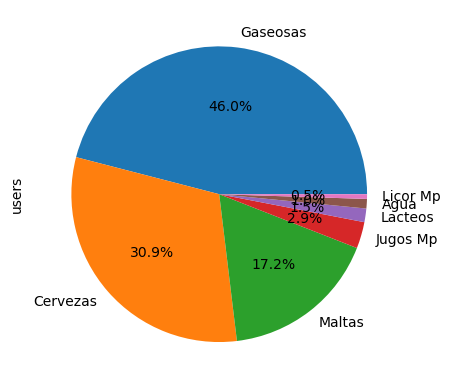

In [39]:
aggregated_df[[QUANTITY,CATEGORY]].groupby([CATEGORY]).size().sort_values(ascending=False).plot(
    kind="pie",
    ylabel="users",
    autopct="%1.1f%%")

<AxesSubplot:xlabel='Category'>

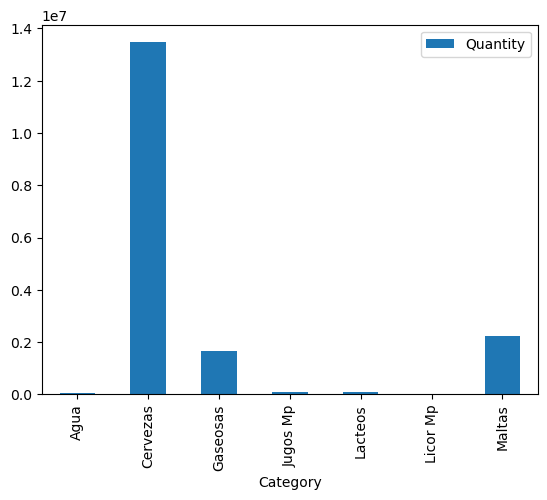

In [40]:
aggregated_df[[QUANTITY,CATEGORY]].groupby([CATEGORY]).sum().plot(kind="bar")

## Visualize Data over Time
First add more data variables.

In [41]:
ORDER_DATE = "OrderDate"
DAY_OF_WEEK = "DayOfWeek"
DAY_OF_MONTH = "DayOfMonth"
MONTH = "Month"

In [42]:
util.add_date_information(aggregated_df, DATE)

In [43]:
aggregated_df.head()

,Date,Account_id,Product_id,Category,Quantity,OrderDate,DayOfWeek,DayOfMonth,Month
0,2022-01-03,33217794,8320,Gaseosas,3,2022-01-03,0,3,1
1,2022-01-03,33217794,8346,Gaseosas,1,2022-01-03,0,3,1
2,2022-01-03,33217794,9090,Gaseosas,4,2022-01-03,0,3,1
3,2022-01-03,33217995,16206,Cervezas,2,2022-01-03,0,3,1
4,2022-01-03,33217995,33808,Cervezas,364,2022-01-03,0,3,1


## Average Sales per Week Day

In [44]:
df = aggregated_df[[DAY_OF_WEEK, QUANTITY]]
df

,DayOfWeek,Quantity
0,0,3
1,0,1
2,0,4
3,0,2
4,0,364
...,...,...
1292723,6,170
1292724,6,20
1292725,6,1
1292726,6,20


<AxesSubplot:>

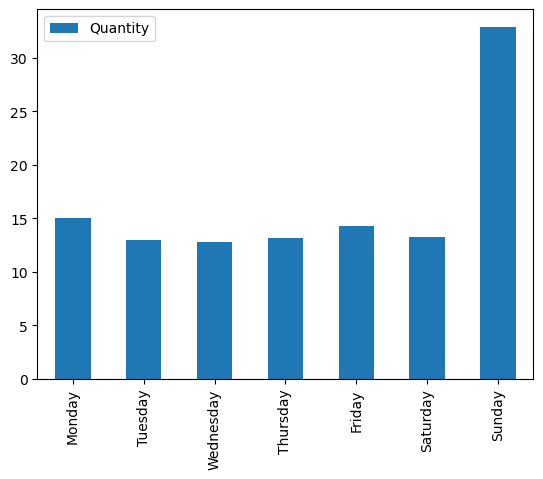

In [45]:
sorted_sales_per_day_week = util.aggregate_data_frame(
    aggregated_df[[DAY_OF_WEEK, QUANTITY]],
    "mean",
    DAY_OF_WEEK)

day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Array
pd.DataFrame(
    {QUANTITY: list(sorted_sales_per_day_week[QUANTITY])},
    index=day_names).plot(kind="bar")

## Average Sales per Month Day

<AxesSubplot:xlabel='DayOfMonth'>

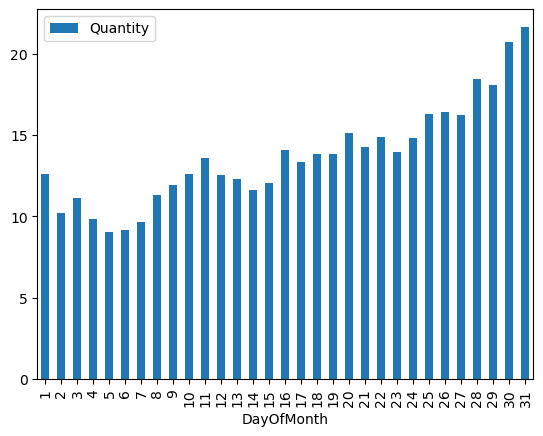

In [46]:
quantity_per_day_month_df = util.aggregate_data_frame(
    aggregated_df[[QUANTITY, DAY_OF_MONTH]],
    "mean",
    DAY_OF_MONTH)

quantity_per_day_month_df.sort_values(
    by=[DAY_OF_MONTH],
    axis=0,
    ascending=True).plot(kind="bar")

## Average Sales Over Time

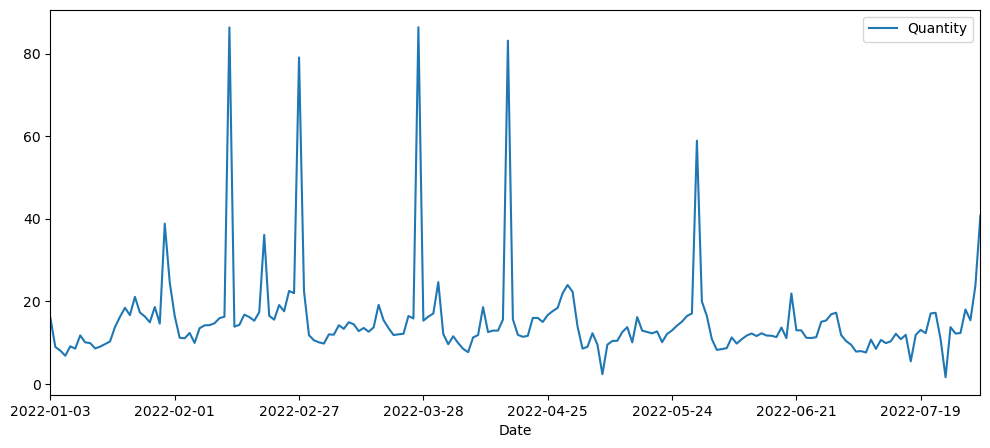

In [47]:
util.aggregate_data_frame(
    aggregated_df[[QUANTITY, DATE]],
    "mean",
    DATE).plot(figsize=(12,5)).autoscale(axis="x",tight=True)

## Top-10 Sold Products

In [48]:
util.get_products_category(
    aggregated_df,
    util.top_k_items(
        aggregated_df,
        PRODUCT_ID,
        QUANTITY,
        k=10))

,Product_id,Category
0,14014,Cervezas
1,14016,Cervezas
2,15354,Maltas
3,34366,Cervezas
4,11646,Cervezas
5,34370,Cervezas
6,11910,Maltas
7,33808,Cervezas
8,23760,Cervezas
9,17466,Cervezas


## Users Study

consider_user = 33238638

In [49]:
user_id = 33238638
user_df = aggregated_df[aggregated_df[ACCOUNT_ID] == user_id]

<AxesSubplot:ylabel='users'>

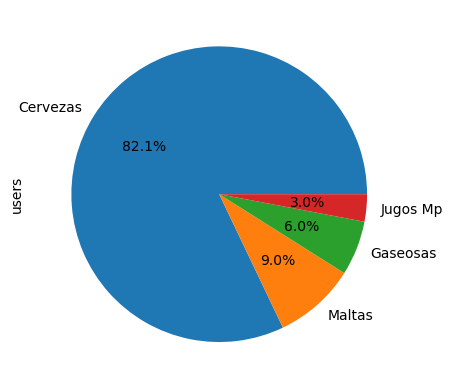

In [50]:
user_df[[QUANTITY,CATEGORY]].groupby([CATEGORY]).size().sort_values(ascending=False).plot(
    kind="pie",
    ylabel="users",
    autopct="%1.1f%%")

<AxesSubplot:xlabel='Category'>

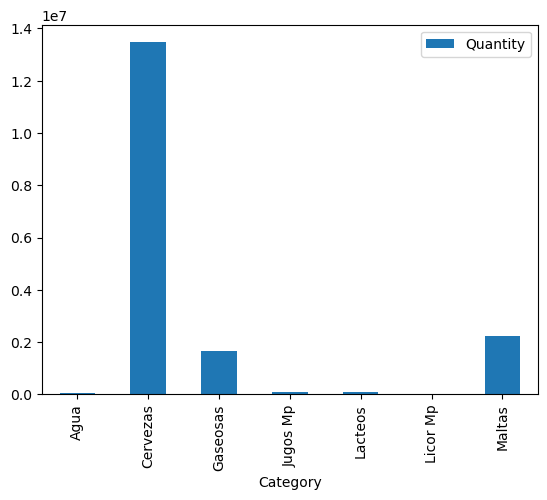

In [51]:
aggregated_df[[QUANTITY,CATEGORY]].groupby([CATEGORY]).sum().plot(kind="bar")

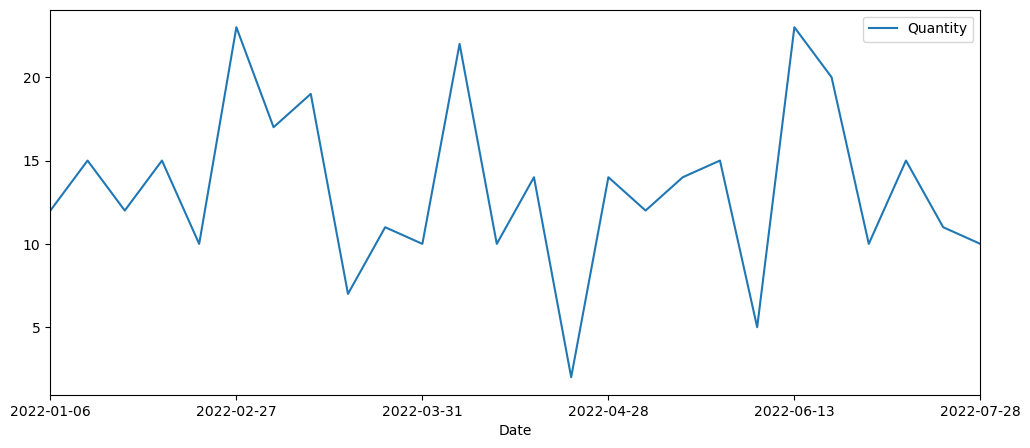

In [52]:
util.aggregate_data_frame(
    user_df[[DATE, QUANTITY]],
    "sum",
    DATE).plot(figsize=(12,5)).autoscale(axis="x",tight=True)

### User Products Over Time

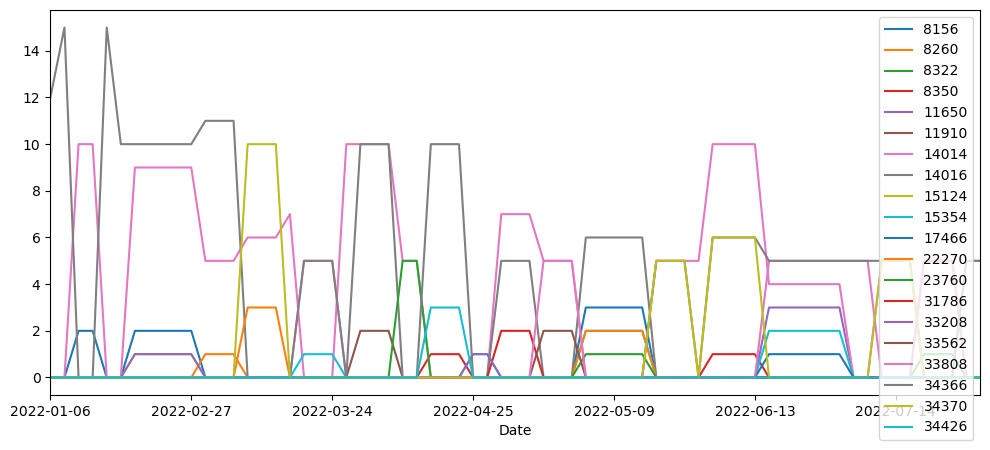

In [53]:
user_dada_df = user_df[[DATE, PRODUCT_ID, QUANTITY]]
user_sales_df = util.transactions_per_day_df(user_dada_df)
user_sales_df.plot(figsize=(12,5)).autoscale(axis="x",tight=True)

In [54]:
top_products = util.top_k_items(user_dada_df, PRODUCT_ID, QUANTITY, k=5)
top_products_df = util.get_products_category(aggregated_df, top_products)
top_products_df

,Product_id,Category
0,14014,Cervezas
1,14016,Cervezas
2,34366,Cervezas
3,34370,Cervezas
4,33808,Cervezas


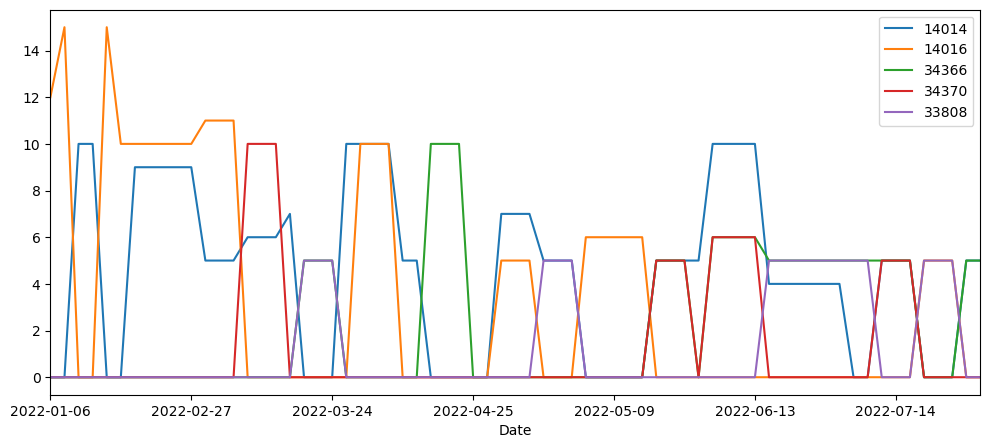

In [55]:
user_sales_df[top_products].plot(figsize=(12,5)).autoscale(axis="x",tight=True)

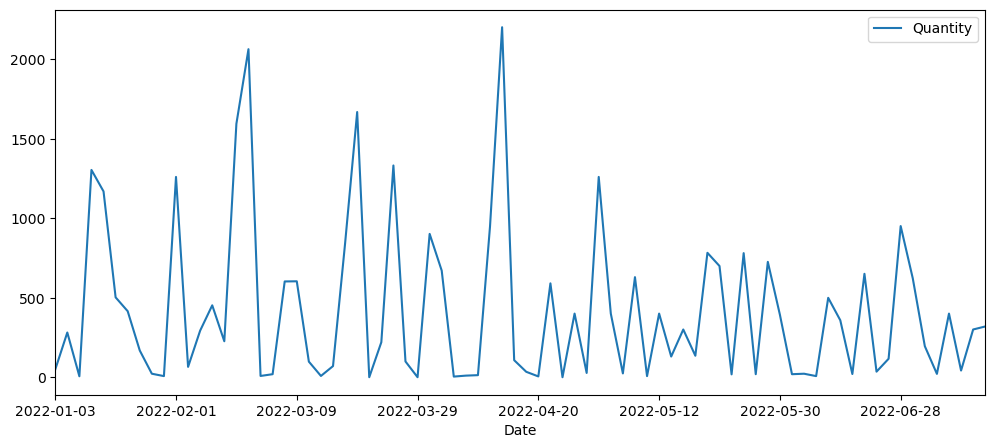

In [56]:
user_id = 33229164
user_df = aggregated_df[aggregated_df[ACCOUNT_ID] == user_id]
util.aggregate_data_frame(
    user_df[[DATE, QUANTITY]],
    "sum",
    DATE).plot(figsize=(12,5)).autoscale(axis="x",tight=True)

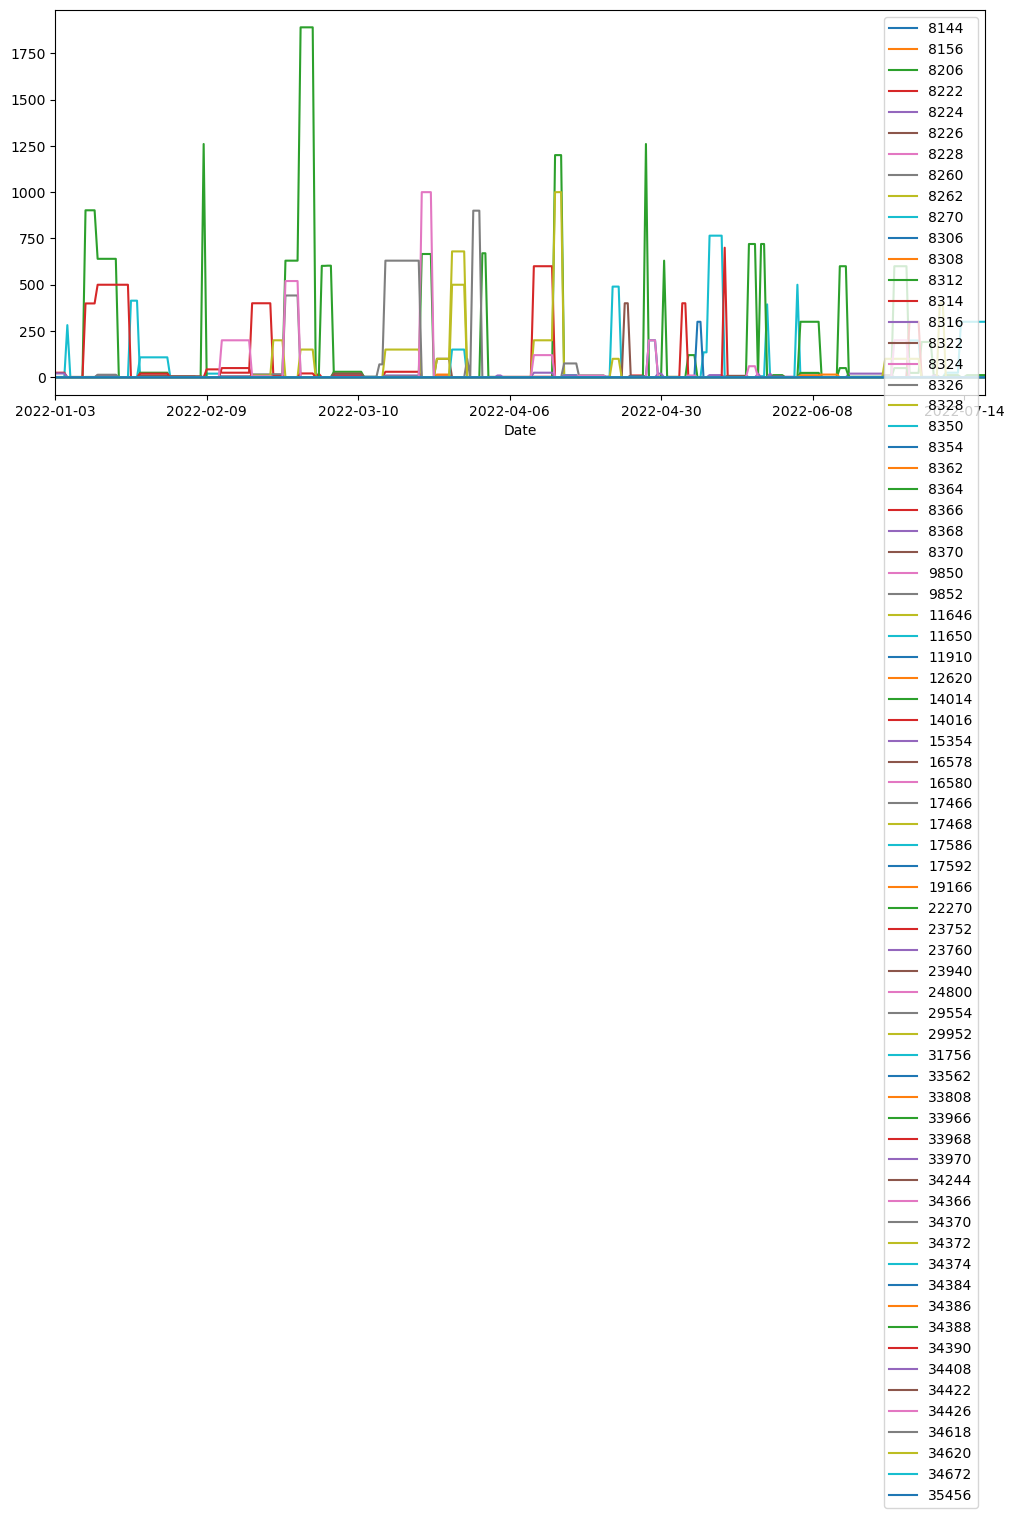

In [57]:
user_dada_df = user_df[[DATE, PRODUCT_ID, QUANTITY]]
user_sales_df = util.transactions_per_day_df(user_dada_df)
user_sales_df.plot(figsize=(12,5)).autoscale(axis="x",tight=True)

In [58]:
top_products = util.top_k_items(user_dada_df, PRODUCT_ID, QUANTITY, k=5)
top_products_df = util.get_products_category(aggregated_df, top_products)
top_products_df


,Product_id,Category
0,14014,Cervezas
1,11650,Cervezas
2,17468,Cervezas
3,14016,Cervezas
4,34370,Cervezas


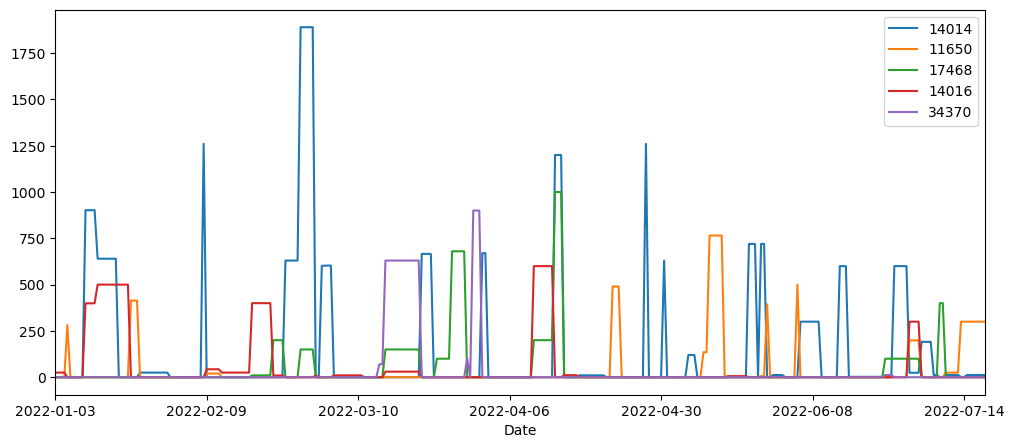

In [59]:
user_sales_df[top_products].plot(figsize=(12,5)).autoscale(axis="x",tight=True)

In [60]:
transactions_df = util.create_transaction_df(
            aggregated_df,
            [DATE, ACCOUNT_ID],
            PRODUCT_ID,
            QUANTITY)

In [61]:
transactions_df

,Date,Account_id,8144,8156,8160,8166,8186,8188,8206,8222,...,35416,35440,35442,35444,35446,35448,35450,35454,35456,Total_quantity
0,2022-01-03,33217794,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,2022-01-03,33217995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,366
2,2022-01-03,33218037,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,2022-01-03,33218052,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,154
4,2022-01-03,33218100,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292101,2022-07-30,40648833,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
292102,2022-07-30,40964562,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
292103,2022-07-31,36889479,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,250
292104,2022-07-31,38305524,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,120


In [62]:
transactions_df[transactions_df[ACCOUNT_ID] == 33218382]

,Date,Account_id,8144,8156,8160,8166,8186,8188,8206,8222,...,35416,35440,35442,35444,35446,35448,35450,35454,35456,Total_quantity
8,2022-01-03,33218382,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,32
2081,2022-01-05,33218382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59
7225,2022-01-08,33218382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
10069,2022-01-12,33218382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
16538,2022-01-15,33218382,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274413,2022-07-16,33218382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
277921,2022-07-20,33218382,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,29
282117,2022-07-23,33218382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
286501,2022-07-27,33218382,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
